In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_dir = 'output_data/'
output_data_file = f"{ output_dir }cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [4]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).

import requests

def city_url(city):
    return f'https://api.openweathermap.org/data/2.5/weather?q={ city }&units=imperial&appid={ weather_api_key }'

responses = []
for i, city in enumerate(cities):
    url = city_url(city)
    print(f'Processing Record { i + 1 } of { len(cities) } | {city}')
    responses.append(requests.get(url))


Processing Record 1 of 600 | palmer
Processing Record 2 of 600 | carlsbad
Processing Record 3 of 600 | kodiak
Processing Record 4 of 600 | george town
Processing Record 5 of 600 | baijiantan
Processing Record 6 of 600 | armacao dos buzios
Processing Record 7 of 600 | santa vitoria do palmar
Processing Record 8 of 600 | mys shmidta
Processing Record 9 of 600 | bethel
Processing Record 10 of 600 | rikitea
Processing Record 11 of 600 | faanui
Processing Record 12 of 600 | taolanaro
Processing Record 13 of 600 | tasiilaq
Processing Record 14 of 600 | cape town
Processing Record 15 of 600 | kuryk
Processing Record 16 of 600 | ust-ilimsk
Processing Record 17 of 600 | hithadhoo
Processing Record 18 of 600 | itarema
Processing Record 19 of 600 | basco
Processing Record 20 of 600 | ketchikan
Processing Record 21 of 600 | saint george
Processing Record 22 of 600 | fukue
Processing Record 23 of 600 | yellowknife
Processing Record 24 of 600 | paamiut
Processing Record 25 of 600 | cidreira
Processi

Processing Record 206 of 600 | bolekhiv
Processing Record 207 of 600 | maceio
Processing Record 208 of 600 | lac du bonnet
Processing Record 209 of 600 | codrington
Processing Record 210 of 600 | comodoro rivadavia
Processing Record 211 of 600 | vallenar
Processing Record 212 of 600 | kil
Processing Record 213 of 600 | manavalakurichi
Processing Record 214 of 600 | hammerfest
Processing Record 215 of 600 | sao filipe
Processing Record 216 of 600 | karaul
Processing Record 217 of 600 | baykit
Processing Record 218 of 600 | necochea
Processing Record 219 of 600 | karratha
Processing Record 220 of 600 | poso
Processing Record 221 of 600 | bandarbeyla
Processing Record 222 of 600 | balykshi
Processing Record 223 of 600 | tilichiki
Processing Record 224 of 600 | barahona
Processing Record 225 of 600 | chaa-khol
Processing Record 226 of 600 | abu kamal
Processing Record 227 of 600 | sarahan
Processing Record 228 of 600 | kushmurun
Processing Record 229 of 600 | barbar
Processing Record 230 o

Processing Record 410 of 600 | azimur
Processing Record 411 of 600 | tysmenychany
Processing Record 412 of 600 | wilmington
Processing Record 413 of 600 | gobabis
Processing Record 414 of 600 | mahajanga
Processing Record 415 of 600 | altagracia de orituco
Processing Record 416 of 600 | mon
Processing Record 417 of 600 | saint-cyr-sur-loire
Processing Record 418 of 600 | hofn
Processing Record 419 of 600 | sao gabriel da cachoeira
Processing Record 420 of 600 | suez
Processing Record 421 of 600 | colonelganj
Processing Record 422 of 600 | muborak
Processing Record 423 of 600 | merauke
Processing Record 424 of 600 | kavaratti
Processing Record 425 of 600 | berlevag
Processing Record 426 of 600 | praia da vitoria
Processing Record 427 of 600 | kualakapuas
Processing Record 428 of 600 | sawakin
Processing Record 429 of 600 | yialos
Processing Record 430 of 600 | santa fe
Processing Record 431 of 600 | turan
Processing Record 432 of 600 | folkestone
Processing Record 433 of 600 | simao
Pro

In [5]:
payloads = [resp.json() for resp in responses if resp is not None]

len(payloads)

600

In [6]:
formatted = [{
    'City': payload['name'],
    'Cloudiness': payload['clouds']['all'],
    'Country': payload['sys']['country'],
    'Date': payload['dt'],
    'Humidity': payload['main']['humidity'],
    'Lat': payload['coord']['lat'],
    'Lng': payload['coord']['lon'],
    'Max Temp': payload['main']['temp_max'],
    'Wind Speed': payload['wind']['speed'],
} for payload in payloads if payload['cod'] == 200]

df = pd.DataFrame(formatted)
df

City  Cloudiness Country        Date  Humidity    Lat  \
0                     Palmer          40      US  1584507963        65  42.16   
1                   Carlsbad           1      US  1584507855        75  33.16   
2          Saint Paul Harbor          40      US  1584507964        75  57.79   
3                George Town          20      MY  1584507964        55   5.41   
4                 Baijiantan          83      CN  1584507965        29  45.63   
5    Santa Vitória do Palmar         100      BR  1584507965        83 -33.52   
6                     Bethel           1      US  1584507827        69  41.37   
7                    Rikitea          45      PF  1584507967        82 -23.12   
8                     Faanui         100      PF  1584507967        70 -16.48   
9                   Tasiilaq          85      GL  1584507968        78  65.61   
10                 Cape Town          20      ZA  1584507700        93 -33.93   
11                     Quryq         100      KZ  1584507969        79  43.20   
12               Ust'-Ilimsk          92      RU  1584507969        77  58.00   
13                 Hithadhoo           0      MV  1584507717        72  -0.60   
14                   Itarema          43      BR  1584507970        96  -2.92   
15                     Basco          39      PH  1584507970        72  20.45   
16                 Ketchikan           1      US  1584507971        65  55.34   
17              Saint George          93      US  1584507971        75  37.10   
18                  Fukuechō          75      JP  1584507971        72  32.69   
19               Yellowknife          20      CA  1584507972        83  62.46   
20                   Paamiut         100      GL  1584507972        84  61.99   
21                  Cidreira          68      BR  1584507973        85 -30.18   
22                     Luwuk          43      ID  1584507973        72  -0.95   
23                    Eureka          90      US  1584507974        75  40.80   
24                     Vaini          75      TO  1584507974        78 -21.20   
25                 Ust-Kuyga           0      RU  1584507974        82  70.02   
26                   Ushuaia          40      AR  1584507975        58 -54.80   
27                 Jamestown          75      US  1584507975        95  42.10   
28                 Upernavik          88      GL  1584507976        52  72.79   
29                    Dikson          97      RU  1584507976        99  73.51   
..                       ...         ...     ...         ...       ...    ...   
515                   Broome          20      US  1584508055        69  42.25   
516                  Shakiso          55      ET  1584508212        45   5.75   
517                  Mareeba          90      AU  1584508212        69 -17.00   
518                 Moorhead          75      US  1584507987        64  46.87   
519                    Ginir           0      ET  1584508213        54   7.13   
520                      Hof          90      DE  1584508214       100  50.32   
521               Walvis Bay          78      NA  1584508044        96 -22.96   
522                    Ukiah          90      US  1584508214        81  39.15   
523                  Terrace           5      CA  1584507980        55  54.52   
524                Bariloche           0      AR  1584508215        65 -41.15   
525                   Waddān         100      LY  1584508216        47  29.16   
526                    Kemin          99      KG  1584508216        71  42.78   
527                  Rosetta          40      EG  1584508217        54  31.40   
528                Tamandaré         100      BR  1584508217        80  -8.76   
529                Nadadores          39      MX  1584508218        68  27.05   
530                   Bekovo           0      RU  1584508218        59  52.47   
531                    Kieta           0      PG  1584508219        66  -6.22   
532                 Novikovo           0      RU  15845

In [7]:
# Export the data to a csv
df.to_csv(output_data_file, mode='w+', index=False)

In [8]:
from scipy.stats import linregress


def plot_lat(df, y_col, y_label=None, reg_form_loc=None, title_prefix=''):
    plt.figure()
    y_label = y_col if y_label is None else y_label
    
    # format date for the title
    most_recent = df['Date'].max()
    formatted_date = time.strftime("%D", time.localtime(most_recent))
    
    plt.scatter(df['Lat'], df[y_col])
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    title = f'{ title_prefix }City Latitude vs. { y_label }'
    plt.title(title + f' ({ formatted_date })')
    plt.grid(True)
    
    if reg_form_loc:
        plot_lat_reg(df, y_col, reg_form_loc)
        
    plt.savefig(f'{ output_dir }{ title }.png'.replace(' ', '_'))
        
    
def plot_lat_reg(df, y_col, reg_form_loc):
    x = df['Lat']
    reg = linregress(x, df[y_col])
    print(f'The r-squared is: { reg.rvalue**2 }')
    
    m = reg.slope
    b = reg.intercept
    plt.plot(x, b + m * x, color='black')
    plot_line_formula(m, b, reg_form_loc)
    
    
def plot_line_formula(m, b, reg_form_loc):
    formatted_m = format(m, ".2f")
    formatted_b = format(b, ".2f")
    formula = f'y = { formatted_m }x + { formatted_b }'
    plt.text(reg_form_loc[0], reg_form_loc[1], formula, size=15)


In [9]:
# Plotting the Data

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot
plot_lat(df, 'Max Temp', 'Max Temperature (F)')

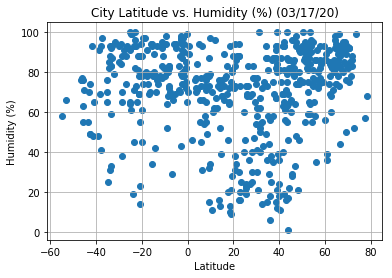

In [10]:
# Latitude vs. Humidity Plot
plot_lat(df, 'Humidity', 'Humidity (%)')

In [11]:
# Latitude vs. Cloudiness Plot
plot_lat(df, 'Cloudiness', 'Cloudiness (%)')

In [12]:
# Latitude vs. Wind Speed Plot
plot_lat(df, 'Wind Speed', 'Wind Speed (mph)')

In [13]:
# Create Northern and Southern Hemisphere DataFrames

# Lat 0 cities will be included in both north and south hemishpere data frames

lat_south = df[df['Lat'] <= 0]
title_prefix_south = 'Southern Hemisphere - '

lat_north = df[df['Lat'] >= 0]
title_prefix_north = 'Northern Hemisphere - '

In [14]:
# Northern Hemisphere - Temperature (F) vs. Latitude
plot_lat(lat_north, 'Max Temp', 'Max Temperature (F)', (0, 0), title_prefix_north)

The r-squared is: 0.7942143599621799


The r-squared is: 0.38904397625711834


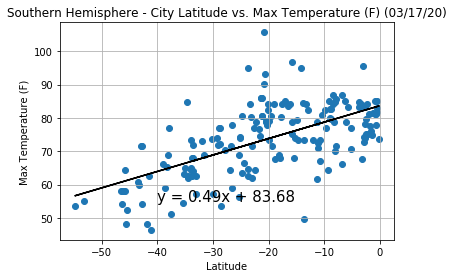

In [15]:
# Southern Hemisphere - Temperature (F) vs. Latitude
plot_lat(lat_south, 'Max Temp', 'Max Temperature (F)', (-40, 55), title_prefix_south)

# Analysis
Temperature is strongly correlated with latitude in the Northern hemisphere. However, there is a correlation between temperature and latitude in the Southern hemishpere, but the relationship appears to be half as strong. This may be because there is more water surface area in the Southern hemisphere which may affect the temperature of the cities here in different ways than those cities in the North. 

In [16]:
# Northern Hemisphere - Humidity (%) vs. Latitude
plot_lat(lat_north, 'Humidity', 'Humidity (%)', (45, 20), title_prefix_north)

The r-squared is: 0.10077215276255407


The r-squared is: 0.04447780977380585


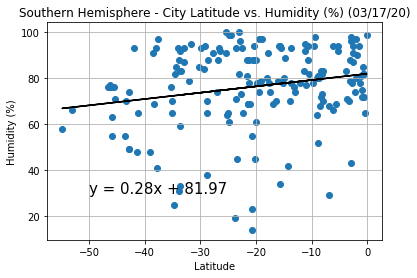

In [17]:
# Southern Hemisphere - Humidity (%) vs. Latitude
plot_lat(lat_south, 'Humidity', 'Humidity (%)', (-50, 30), title_prefix_south)

# Analysis
In both hemispheres, there does not appear to be a strong correlation between the latitude and humidity. This may be because humidity may be more related to geographical features of the city, such as whether it is coastal or at a high elevation. 

The r-squared is: 0.0924645145854093


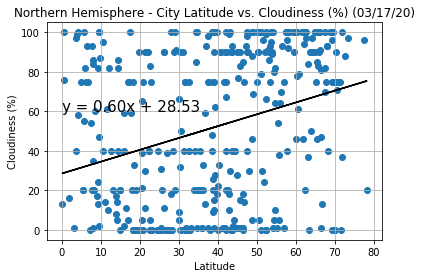

In [18]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
plot_lat(lat_north, 'Cloudiness', 'Cloudiness (%)', (0, 60), title_prefix_north)

The r-squared is: 0.07295321956075697


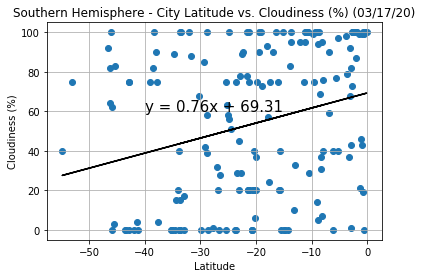

In [19]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
plot_lat(lat_south, 'Cloudiness', 'Cloudiness (%)', (-40, 60), title_prefix_south)

# Analysis
In both hemispheres, there does not appear to be a strong correlation between the latitude and cloudiness. This may be because cloudiness is more related to the surrounding terrain, like mountains and the elevation of the city. 

In [20]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
plot_lat(lat_north, 'Wind Speed', 'Wind Speed (mph)', (0, 15), title_prefix_north)

The r-squared is: 0.027122117477350226


In [21]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
plot_lat(lat_south, 'Wind Speed', 'Wind Speed (mph)', (-50, 7), title_prefix_south)

The r-squared is: 0.058804825006887516


# Analysis
In both hemispheres, there does not appear to be a strong correlation between the latitude and wind speed. This may be because wind speed is more related to elevation and distance to the coast than to latitude. 
